<a href="https://colab.research.google.com/github/emrllh/My_works/blob/main/Using_Fashion_Mnist_Dataset_for_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Using Fashion Mnist Dataset for Deep Learning

In [ ]:
#Import necessary libraries
import tensorflow as tf
import keras
import numpy as np
import pandas as pd

In [ ]:
f_mnist=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#load the Fasion Mnist Dataset
(X_train_full,y_train_full),(X_test_full,y_test_full)=keras.datasets.fashion_mnist.load_data()

In [ ]:
#Checking data shape
X_train_full.shape,y_train_full.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
#Creating our own validation alternatively can create it with the model and also normalize the dataset by division
X_train,X_val=X_train_full[:50000]/255,X_train_full[50000:]/255
y_train,y_val=y_train_full[:50000],y_train_full[50000:]
X_test=X_test/255

In [ ]:
#Lets look the shape of our data
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((50000, 28, 28), (50000,), (10000, 28, 28), (10000,))

In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

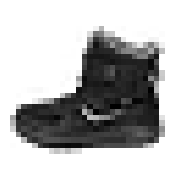

In [ ]:
# plot the image what it looks like
import matplotlib.pyplot as plt
plt.figure(figsize=(2,3))
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
y_train[0]

9

In [ ]:
class_names[y_train[0]]

'Ankle boot'

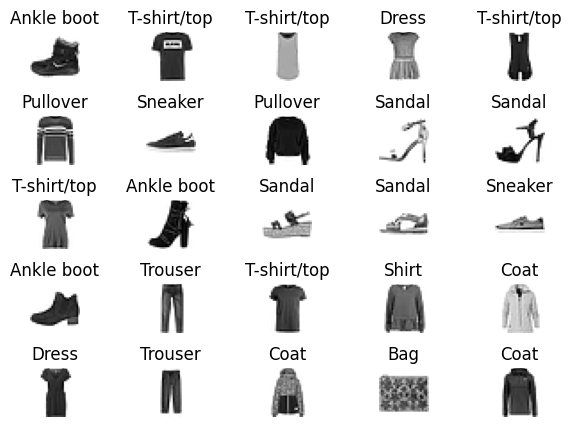

In [ ]:
#plot the whole image chart
plt.figure(figsize=(7,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid('False')
  plt.imshow(X_train[i],cmap='binary')
  plt.axis('off')
  plt.xticks([])
  plt.yticks([])
  plt.title(class_names[y_train[i]]) #show the class titles
plt.subplots_adjust(hspace=0.7,wspace=0.5) #space for image itself and title of it
plt.show()

In [ ]:
#Creating model Using Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),# flatten the input
    tf.keras.layers.Dense(300,activation='relu'),#The first layer has 300 neurons
    tf.keras.layers.Dense(100,activation='relu'),#second layer has 100 neurons
    tf.keras.layers.Dense(10,activation='softmax') #as the output is multiclass classification we are using softmax for probability

])

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


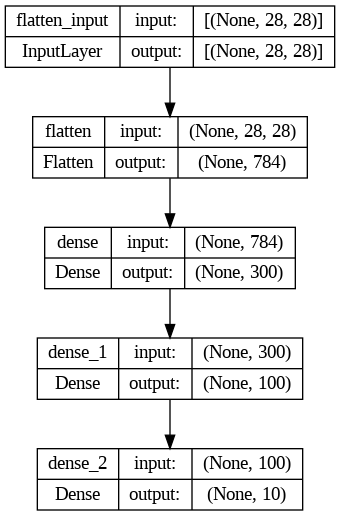

In [ ]:

# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
# see the model layers
model.layers

In [ ]:
hiden2=model.layers[2]
hiden2.name

'dense_1'

In [ ]:
hiden1=model.layers[1]
hiden1.name

'dense'

In [ ]:
weights1,biases1=hiden1.get_weights()

Why all biases are 0 and random weights assigned:



![Screenshot 2023-12-28 225839.png](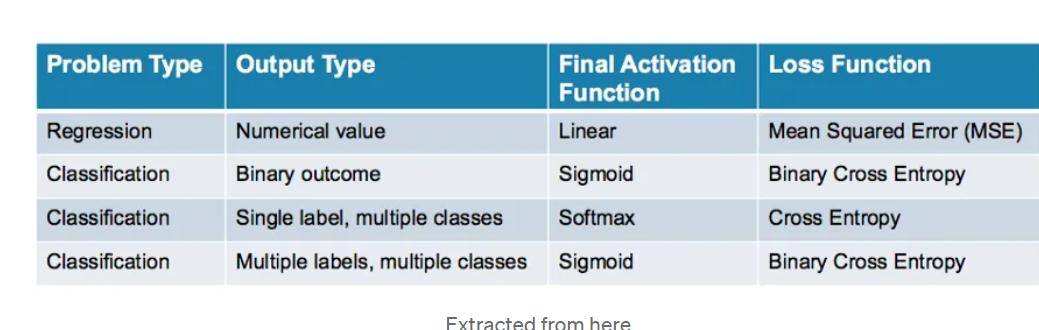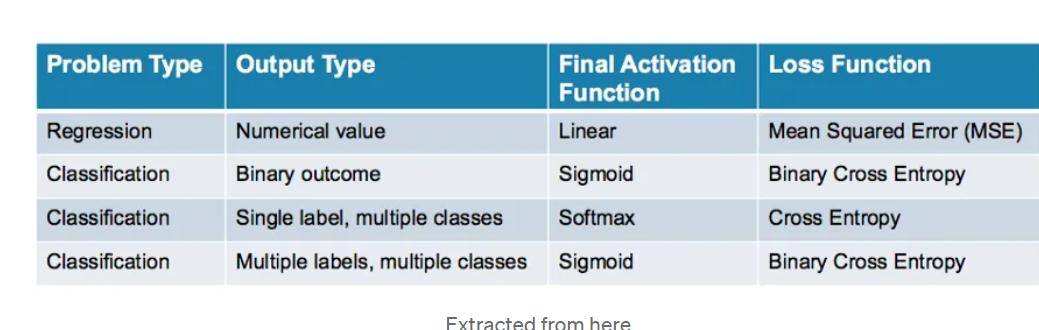)
https://stackoverflow.com/questions/43498037/why-add-zero-bias-in-neural-networks#:~:text=You%20could%20start%20with%20random,to%20zero%20is%20simplest%20approach.


In [ ]:
weights1,weights1.shape

(array([[-0.00463914,  0.05944629,  0.00664492, ..., -0.00424589,
          0.03919461, -0.03737084],
        [-0.02783399,  0.00013664,  0.05010408, ..., -0.03141801,
          0.06232978, -0.01691554],
        [-0.03571886, -0.05394496,  0.03715101, ..., -0.05005904,
          0.03679645, -0.06373011],
        ...,
        [ 0.00700296,  0.0525981 ,  0.00403173, ...,  0.0609753 ,
         -0.03812148, -0.0707445 ],
        [ 0.0177938 , -0.06268765, -0.06611315, ..., -0.0218132 ,
         -0.01198625,  0.06985815],
        [-0.05508418, -0.03168467, -0.04665504, ..., -0.05180196,
         -0.01726619,  0.01104785]], dtype=float32),
 (784, 300))

In [ ]:
biases1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
weights,biases=hiden2.get_weights()

In [ ]:
weights,weights.shape

(array([[-0.0485702 , -0.00104581,  0.01000357, ...,  0.01333684,
         -0.02454346, -0.02464058],
        [ 0.07101604, -0.03974558, -0.01920409, ..., -0.10244423,
          0.01163418, -0.00918206],
        [ 0.00989679,  0.07860283, -0.06665297, ...,  0.01317323,
         -0.01450411,  0.03866778],
        ...,
        [ 0.0863151 , -0.02613093, -0.05962408, ..., -0.08311572,
          0.09802368, -0.00814031],
        [-0.08677641, -0.05290599,  0.0826376 , ..., -0.02804215,
          0.09309489,  0.04136517],
        [ 0.05947708,  0.11812917, -0.05527439, ..., -0.03050833,
          0.1179413 ,  0.10762546]], dtype=float32),
 (300, 100))

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

##Compiling The Model
*sparse_categorical_crossentropy vs categorical_crossentropy*

https://fmorenovr.medium.com/sparse-categorical-cross-entropy-vs-categorical-cross-entropy-ea01d0392d28

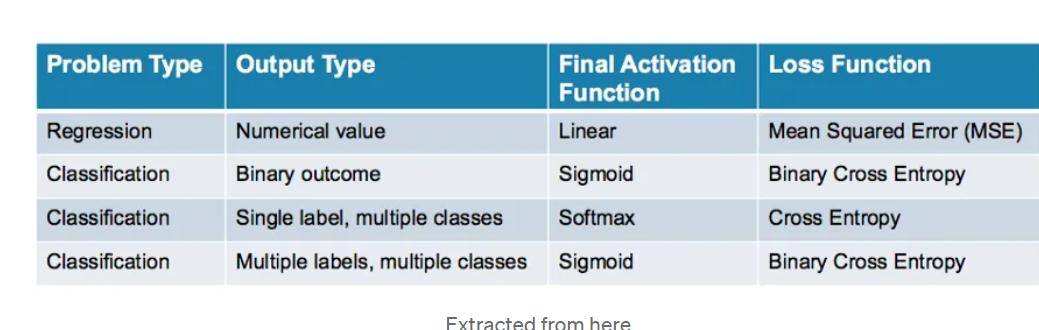

In [ ]:
#Show the table for final activation functions and loss function
from IPython.display import Image
Image('deeplearning.png')

In [ ]:
#class names to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([1,5,1,0],num_classes=10),

In [ ]:
# extra code – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [ ]:
#Creating early stopping
#l changed patience from 20 to 3 as the model not imporove so l dont want the model to try more
# Baseline to None is stating that the model's accuracy starts no top limit
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss',restore_best_weights=True,
                                            verbose=1,patience=5,baseline=None)

In [ ]:
#Fit the model
history=model.fit(X_train,y_train,epochs=50,
                  validation_data=(X_val,y_val),verbose=2,
                  callbacks=[early_stopping])

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Restoring model weights from the end of the best epoch: 31.
Epoch 36: early stopping


In [ ]:
history.params

{'verbose': 3, 'epochs': 50, 'steps': 1563}

In [ ]:
history.history

{'loss': [0.7247092127799988,
  0.4940873384475708,
  0.4470996558666229,
  0.41903063654899597,
  0.3978917896747589,
  0.3827693462371826,
  0.36860379576683044,
  0.3558381497859955,
  0.3459469676017761,
  0.33590808510780334,
  0.32739660143852234,
  0.31988391280174255,
  0.31240054965019226,
  0.3049013018608093,
  0.29834413528442383,
  0.2929792106151581,
  0.2868582606315613,
  0.28074413537979126,
  0.27499598264694214,
  0.26949945092201233,
  0.2646281123161316,
  0.2604404389858246,
  0.25675442814826965,
  0.2502303421497345,
  0.24615147709846497,
  0.24268831312656403,
  0.23839449882507324,
  0.23373423516750336,
  0.23035597801208496,
  0.22635172307491302,
  0.22309552133083344,
  0.2193690836429596,
  0.21533402800559998,
  0.21202155947685242,
  0.20878790318965912,
  0.20564377307891846],
 'sparse_categorical_accuracy': [0.7646200060844421,
  0.8295400142669678,
  0.8439199924468994,
  0.8537399768829346,
  0.8607800006866455,
  0.8652399778366089,
  0.8698400259

<Figure size 800x500 with 0 Axes>

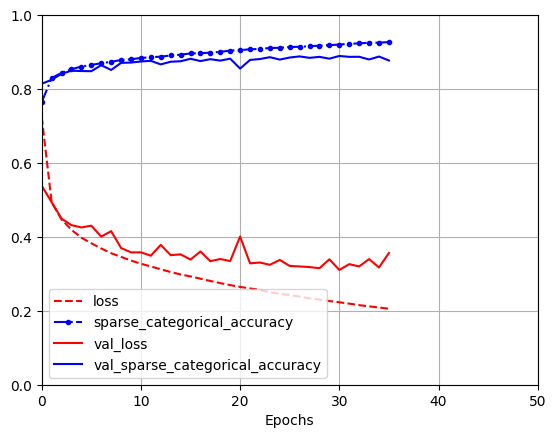

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot(
    xlim=[0,50],ylim=[0,1],grid=True,xlabel='Epochs',
    style=['r--','b-..','r-','b-'])

plt.legend(loc='lower left')
plt.savefig('fasion_mnist')
plt.show()



In [ ]:
#Evaluating the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3281 - sparse_categorical_accuracy: 0.8858


[0.3280574381351471, 0.8858000040054321]

In [ ]:
#Using the model to make prediction on new test
X_new=X_test[:5]
y_prob=model.predict(X_new)
y_prob

1/1 [==============================] - 0s 17ms/step


array([[1.3607242e-06, 4.0948858e-06, 3.5050941e-06, 1.7832910e-05,
        1.0828705e-05, 2.1193551e-02, 2.1570238e-06, 1.4958736e-02,
        3.0882784e-05, 9.6377701e-01],
       [7.3963888e-06, 2.1917346e-09, 9.9822897e-01, 4.9876392e-09,
        1.5059480e-03, 1.5725729e-10, 2.5778651e-04, 2.7969943e-10,
        5.6763776e-09, 5.2625886e-11],
       [9.5428027e-07, 9.9999809e-01, 1.2104522e-08, 8.6091666e-07,
        1.4334401e-07, 2.7098507e-10, 1.9386777e-08, 2.5453863e-11,
        2.6437269e-10, 3.2139402e-11],
       [1.1417092e-06, 9.9991047e-01, 1.0003214e-06, 8.4110208e-05,
        2.6747584e-06, 6.4961112e-09, 5.1960819e-07, 2.5500397e-09,
        3.5648051e-10, 1.8070811e-08],
       [1.4539807e-01, 3.5324636e-05, 2.5706857e-02, 1.8856550e-03,
        1.3644979e-02, 4.4323606e-06, 8.1244153e-01, 1.9412253e-06,
        8.6079841e-04, 2.0490768e-05]], dtype=float32)

In [ ]:
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.15, 0.  , 0.03, 0.  , 0.01, 0.  , 0.81, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
class_names[y_test[2]]

'Trouser'

By adding the axis argument, numpy looks at the rows and columns individually.
axis=-1 means that the operation is performed across the rows of `y_pred`.

That means `np.argmax(y_pred, axis=-1)` returns [0, 0, 0, 0, 0, 0, 0, 0, 1, 0] because y_pred has 10 rows. The index of the maximum value in the last row is 9, the index of the maximum value of the ninth row is 6. This is what it means in the code comments ‘from log probabilities to 0 or 9’.

In [ ]:
y_pred=y_prob.argmax(axis=-1)
y_pred

array([9, 2, 1, 1, 6])

In [ ]:
#only integer scalar arrays can be converted to a scalar index
class_names[y_pred]

TypeError: ignored

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

9
2
1
1
6


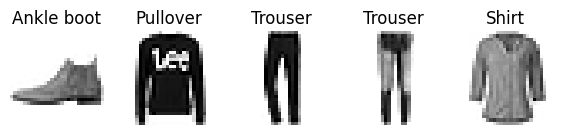

In [ ]:
#this cell generates and saves Figure

plt.figure(figsize=(7,3))
for index,image in enumerate(X_new):
  plt.subplot(1,5,index+1)
  plt.imshow(image,cmap='binary')
  plt.axis('off')
  plt.title(class_names[y_test[index]])

plt.subplots_adjust(hspace=0.7)
plt.savefig('fashion_mnist_plot')
plt.show()

As long as two models share the same architecture you can share weights between them. So, when restoring a model from weights-only, create a model with the same architecture as the original model and then set its weights

https://www.tensorflow.org/tutorials/keras/save_and_load

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

In [ ]:
#Saving the model
model.save("my_keras_model", save_format="tf")

In [ ]:
#Loading model
new_model = tf.keras.models.load_model('my_model.keras')

# Show the model architecture
new_model.summary()

In [ ]:
##Loading model
new_model=tf.keras.models.load_model('my_keras_model')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
